# <img style="float: left; padding-right: 10px; width: 45px" src="iacs.png"> S-109A Introduction to Data Science: 

## Homework 2: Linear and k-NN Regression


**Harvard University**<br/>
**Summer 2018**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader

<hr style="height:2pt">


### INSTRUCTIONS

- To submit your assignment follow the instructions given in canvas.
- Restart the kernel and run the whole notebook again before you submit. 
- If you submit individually and you have worked with someone, please include the name of your [one] partner below. 

Names of people you have worked with goes here: 



<hr style="height:2pt">

In [68]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.api import OLS
%matplotlib inline

<div class="theme"> Main Theme: Predicting Taxi Pickups in NYC </div>

In this homework, we will explore k-nearest neighbor and linear regression methods for predicting a quantitative variable. Specifically, we will build regression models that can predict the number of taxi pickups in New York city at any given time of the day. These prediction models will be useful, for example, in monitoring traffic in the city.

The data set for this problem is given in the file `dataset_1.csv`.  You will need to separate it into training and test sets. The first column contains the time of a day in minutes, and the second column contains the number of pickups observed at that time. The data set covers taxi pickups recorded in NYC during Jan 2015.

We will fit regression models that use the time of the day (in minutes) as a predictor and predict the average number of taxi pickups at that time. The models will be fitted to the training set and  evaluated on the test set. The performance of the models will be evaluated using the $R^2$ metric.

<div class="exercise"> <b> Question 1 [10 pts]</b> </div>

**1.1**. Use pandas to load the dataset from the csv file `dataset_1.csv` into a pandas data frame.  Use the `train_test_split` method from `sklearn` with a `random_state` of 42 and a `test_size` of 0.2 to split the dataset into training and test sets.  Store your train set dataframe in the variable `train_data`.  Store your test set dataframe in the variable `test_data`.


**1.2**. Generate a scatter plot of the training data points with well-chosen labels on the x and y axes. The time of the day should be on the x-axis and the number of taxi pickups on the y-axis.  Make sure to title your plot.

**1.3**. Does the pattern of taxi pickups make intuitive sense to you? 


### Answers

**1.1**

In [547]:
data = pd.read_csv("dataset_1.csv")
data.head()

traindf, testdf = train_test_split(data, test_size = 0.2, random_state = 42)

train_data = traindf
test_data = testdf

**1.2**

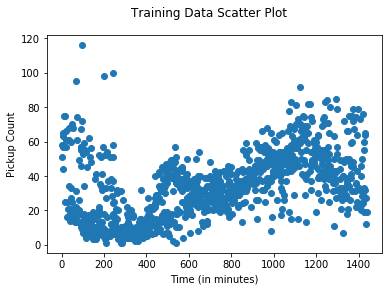

In [551]:
y_train = traindf.PickupCount
x_train = traindf.TimeMin

fig_wt, ax_wt = plt.subplots(1,1)
ax_wt.scatter(x_train, y_train)
ax_wt.set_xlabel(r'Time (in minutes)')
ax_wt.set_ylabel(r'Pickup Count')
fig_wt.suptitle('Training Data Scatter Plot', fontsize=12);

**1.3**

**Does the pattern of taxi pickups make intuitive sense to you?**

Yes, it makes sense. Earlier parts of the day, there are more pickups and then after work, there are more pickups. Small spikes around lunch time and around dinner time. The pattern makes perfect sense.

<div class="exercise"> <b>Question 2 [20 pts]</b> </div>

In lecture we've seen k-Nearest Neighbors (k-NN) Regression, a non-parametric regression technique.  In the following problems please use built-in functionality from `sklearn` to run k-NN Regression. 


**2.1**. Choose `TimeMin` as your predictor variable (aka, feature) and `PickupCount` as your response variable.  Create a dictionary of `KNeighborsRegressor` objects and call it `KNNModels`.  Let the key for your `KNNmodels` dictionary be the value of $k$ and the value be the corresponding `KNeighborsRegressor` object. For $k \in \{1, 10, 75, 250, 500, 750, 1000\}$, fit k-NN regressor models on the training set (`train_data`). 

**2.2**.  For each $k$ on the training set, overlay a scatter plot of the actual values of `PickupCount` vs. `TimeMin` with a scatter plot of predicted `PickupCount` vs `TimeMin`.  Do the same for the test set.  You should have one figure with 2 x 7 total subplots; for each $k$ the figure should have two subplots, one subplot for the training set and one for the test set. 

**Hints**:
1. In each subplot, use two different colors and/or markers to distinguish k-NN regression prediction values from that of the actual data values.
2. Each subplot must have appropriate axis labels, title, and legend.
3. The overall figure should have a title.  (use `suptitle`)


**2.3**. Report the $R^2$ score for the fitted models on both the training and test sets for each $k$.

**Hints**:
1. Reporting the $R^2$ values in tabular form is encouraged.
2. You should order your reported $R^2$ values by $k$.

**2.4**. Plot the $R^2$ values from the model on the training and test set as a function of $k$ on the same figure.  

**Hints**:
1. Again, the figure must have axis labels and a legend.
2. Differentiate $R^2$ visualization on the training and test set by color and/or marker.
3. Make sure the $k$ values are sorted before making your plot.

**2.5**. Discuss the results:

1. If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?  
2. What does an $R^2$ score of $0$ mean?  
3. What would a negative $R^2$ score mean?  Are any of the calculated $R^2$ you observe negative?
4. Do the training and test $R^2$ plots exhibit different trends?  Describe.  
5. How does the value of $k$ affect the fitted model and in particular the training and test $R^2$ values?
6. What is the best value of $k$ and what are the corresponding training/test set $R^2$ values?

### Answers

**2.1**

In [744]:
y_train = traindf.PickupCount
x_train = traindf.TimeMin
y_test = testdf.PickupCount
x_test = testdf.TimeMin

# make them into 2d array
x_train1 = x_train.values.reshape(x_train.shape[0], 1)
y_train1 = y_train.values.reshape(y_train.shape[0], 1)
x_test1 = x_test.values.reshape(-1,1)
y_test1 = y_test.values.reshape(-1,1)

KNNModels = {}
# Do a bunch of KNN regressions
for k in [1, 10, 75, 250, 500, 750, 1000]:
    knnreg = KNeighborsRegressor(n_neighbors=k)
    knnreg.fit(x_train1, y_train1)
    KNNModels[k] = knnreg # Store the regressors in a dictionary

**2.2**

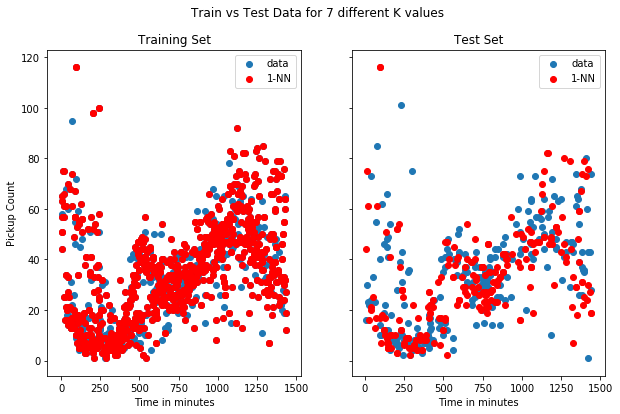

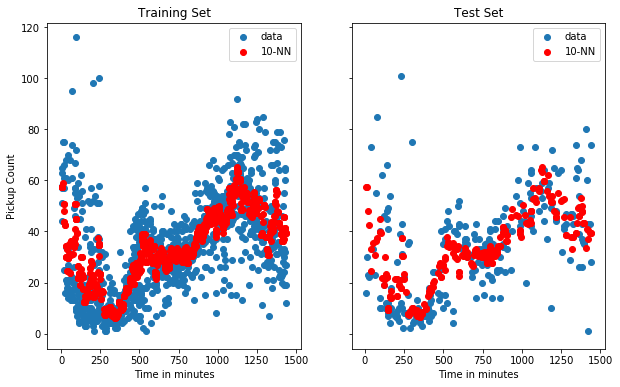

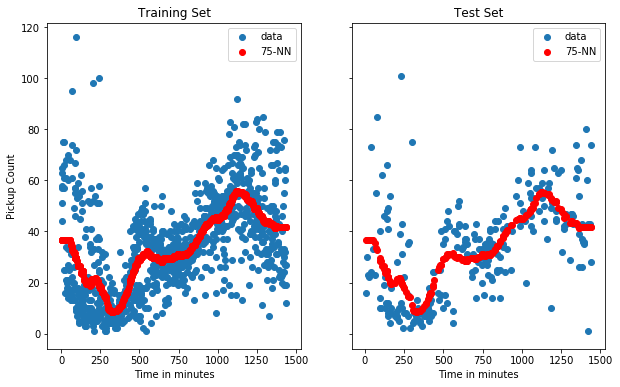

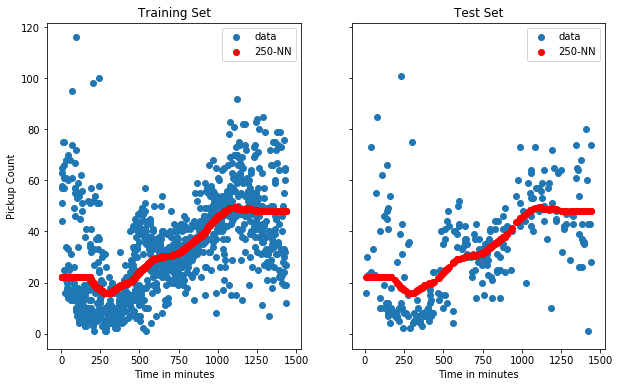

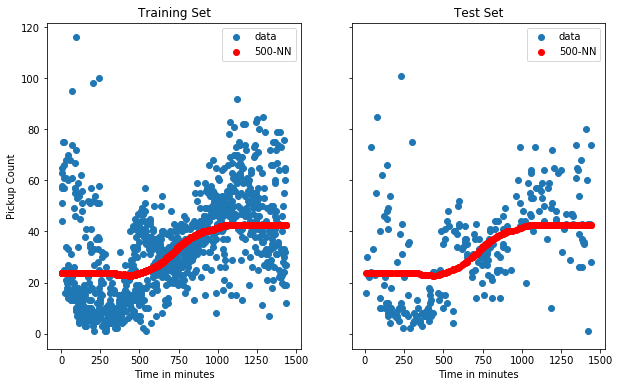

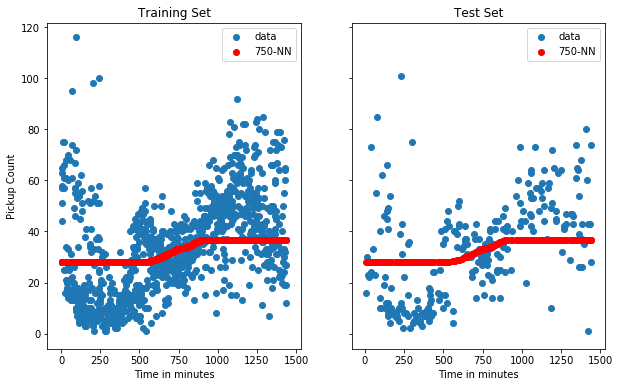

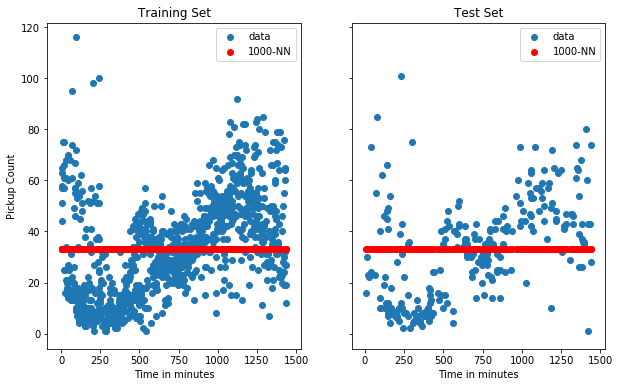

In [553]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,6))
ax1.scatter(x_train, y_train, label="data")
ax1.set_xlabel("Time in minutes")
ax2.set_xlabel("Time in minutes")
ax1.set_ylabel("Pickup Count")
ax1.set_title('Training Set')
ax2.set_title('Test Set')
ax2.scatter(x_test, y_test, label="data")
for k in [1]:
    # training data
    prediction_train = KNNModels[k].predict(x_train1)
    ax1.scatter(x_train1, prediction_train, color="red", label="{}-NN".format(k))
    # testing data
    prediction_test = KNNModels[k].predict(x_test1)
    ax2.scatter(x_test1, prediction_test, color="red", label="{}-NN".format(k))

ax1.legend();
ax2.legend();
f.suptitle('Train vs Test Data for 7 different K values', fontsize=12);

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,6))
ax1.scatter(x_train, y_train, label="data")
ax1.set_xlabel("Time in minutes")
ax2.set_xlabel("Time in minutes")
ax1.set_ylabel("Pickup Count")
ax1.set_title('Training Set')
ax2.set_title('Test Set')
ax2.scatter(x_test, y_test, label="data")
for k in [10]:
    # training data
    prediction_train = KNNModels[k].predict(x_train1)
    ax1.scatter(x_train1, prediction_train, color="red", label="{}-NN".format(k))
    # testing data
    prediction_test = KNNModels[k].predict(x_test1)
    ax2.scatter(x_test1, prediction_test, color="red", label="{}-NN".format(k))

ax1.legend();
ax2.legend();

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,6))
ax1.scatter(x_train, y_train, label="data")
ax1.set_xlabel("Time in minutes")
ax2.set_xlabel("Time in minutes")
ax1.set_ylabel("Pickup Count")
ax1.set_title('Training Set')
ax2.set_title('Test Set')
ax2.scatter(x_test, y_test, label="data")
for k in [75]:
    # training data
    prediction_train = KNNModels[k].predict(x_train1)
    ax1.scatter(x_train1, prediction_train, color="red", label="{}-NN".format(k))
    # testing data
    prediction_test = KNNModels[k].predict(x_test1)
    ax2.scatter(x_test1, prediction_test, color="red", label="{}-NN".format(k))

ax1.legend();
ax2.legend();

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,6))
ax1.scatter(x_train, y_train, label="data")
ax1.set_xlabel("Time in minutes")
ax2.set_xlabel("Time in minutes")
ax1.set_ylabel("Pickup Count")
ax1.set_title('Training Set')
ax2.set_title('Test Set')
ax2.scatter(x_test, y_test, label="data")
for k in [250]:
    # training data
    prediction_train = KNNModels[k].predict(x_train1)
    ax1.scatter(x_train1, prediction_train, color="red", label="{}-NN".format(k))
    # testing data
    prediction_test = KNNModels[k].predict(x_test1)
    ax2.scatter(x_test1, prediction_test, color="red", label="{}-NN".format(k))

ax1.legend();
ax2.legend();

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,6))
ax1.scatter(x_train, y_train, label="data")
ax1.set_xlabel("Time in minutes")
ax2.set_xlabel("Time in minutes")
ax1.set_ylabel("Pickup Count")
ax1.set_title('Training Set')
ax2.set_title('Test Set')
ax2.scatter(x_test, y_test, label="data")
for k in [500]:
    # training data
    prediction_train = KNNModels[k].predict(x_train1)
    ax1.scatter(x_train1, prediction_train, color="red", label="{}-NN".format(k))
    # testing data
    prediction_test = KNNModels[k].predict(x_test1)
    ax2.scatter(x_test1, prediction_test, color="red", label="{}-NN".format(k))

ax1.legend();
ax2.legend();

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,6))
ax1.scatter(x_train, y_train, label="data")
ax1.set_xlabel("Time in minutes")
ax2.set_xlabel("Time in minutes")
ax1.set_ylabel("Pickup Count")
ax1.set_title('Training Set')
ax2.set_title('Test Set')
ax2.scatter(x_test, y_test, label="data")
for k in [750]:
    # training data
    prediction_train = KNNModels[k].predict(x_train1)
    ax1.scatter(x_train1, prediction_train, color="red", label="{}-NN".format(k))
    # testing data
    prediction_test = KNNModels[k].predict(x_test1)
    ax2.scatter(x_test1, prediction_test, color="red", label="{}-NN".format(k))

ax1.legend();
ax2.legend();

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,6))
ax1.scatter(x_train, y_train, label="data")
ax1.set_xlabel("Time in minutes")
ax2.set_xlabel("Time in minutes")
ax1.set_ylabel("Pickup Count")
ax1.set_title('Training Set')
ax2.set_title('Test Set')
ax2.scatter(x_test, y_test, label="data")
for k in [1000]:
    # training data
    prediction_train = KNNModels[k].predict(x_train1)
    ax1.scatter(x_train1, prediction_train, color="red", label="{}-NN".format(k))
    # testing data
    prediction_test = KNNModels[k].predict(x_test1)
    ax2.scatter(x_test1, prediction_test, color="red", label="{}-NN".format(k))

ax1.legend();
ax2.legend();

**2.3**

In [742]:
training_scores = {}
# Do a bunch of KNN regressions
for k in [1, 10, 75, 250, 500, 750, 1000]:
    knnreg = KNeighborsRegressor(n_neighbors=k)
    knnreg.fit(x_train1, y_train1)
    r2 = knnreg.score(x_train1, y_train1)
    training_scores[k] = r2 

print('Train Data')
df = pd.DataFrame([training_scores], columns=training_scores.keys())
print (df)

print('------------')

test_scores = {}
# Do a bunch of KNN regressions
for k in [1, 10, 75, 250, 500, 750, 1000]:
    knnreg = KNeighborsRegressor(n_neighbors=k)
    knnreg.fit(x_train1, y_train1)
    r2 = knnreg.score(x_test1, y_test1)
    test_scores[k] = r2 
    
print('Test Data')
df2 = pd.DataFrame([test_scores], columns=test_scores.keys())
print (df2)

Train Data
       1         10        75        250       500       750   1000
0  0.712336  0.509825  0.445392  0.355314  0.290327  0.179434   0.0
------------
Test Data
       1         10       75        250       500       750       1000
0 -0.418932  0.272068  0.39031  0.340341  0.270321  0.164909 -0.000384


**2.4**

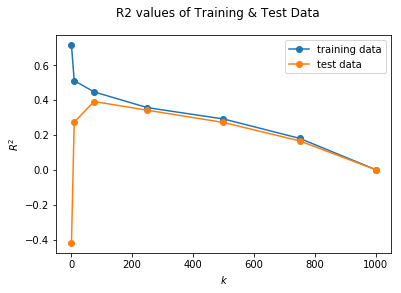

In [649]:
fig, ax = plt.subplots(1,1)
ax.plot(list(training_scores.keys()), list(training_scores.values()),'o-', label="training data")
ax.plot(list(test_scores.keys()), list(test_scores.values()),'o-', label="test data")
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$R^{2}$')
ax.legend();
fig.suptitle('R2 values of Training & Test Data', fontsize=12);


**2.5**

**Discuss the results**


1. *If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?*  

As k=n, the k-NN regression model's prediction start to become more centered. For example, in the graphs from 2.2, as k got bigger, the scatter plot for the k-NN predictions become more like a line, with the actual values being above or below. The k-NN regression model becomes less of a good fit as the k value becomes larger and goes toward n.

2. *What does an $R^2$ score of $0$ mean?*

R2 of 0 means that that k value provides one of the variability of the data around its mean, therefore r2 of 0 means that the model is poorly fitted to the data.

#source: http://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit

3. *What would a negative $R^2$ score mean?  Are any of the calculated $R^2$ you observe negative?*

Negative r2 value means that the regresstion line is worse than using the mean value.

Yes, the two negative R2 values are in the test data for k=1 and k=1000.

#source: http://www.fairlynerdy.com/what-is-r-squared/

4. *Do the training and test $R^2$ plots exhibit different trends?  Describe.*  

Yes, as shown on the plot in 2,4 they exhibit opposite characteristics from k=0 to k=250. From there, they seem to exhibit very similar trends. As k increases, the R2 value decreases.
        
5. *How does the value of $k$ affect the fitted model and in particular the training and test $R^2$ values?*

For the training set, r2 values decreases as k increases. For the test set, r2 values increase from k=0 and then start to decrease as k increases again. The plot in 2.4 shows this trend perfectly.
    
6. *What is the best value of $k$ and what are the corresponding training/test set $R^2$ values?*

For the training set, the best k value is 1, where the r2 value is 0.71. 

For the train set, the best k value was 75, where the r2 value is 0.39.

<div class="exercise"> <b> Question 3  [20 pts] </b></div>

We next consider simple linear regression for the same train-test data sets, which we know from lecture is a parametric approach for regression that assumes that the response variable has a linear relationship with the predictor.  Use the `statsmodels` module for Linear Regression. This module has built-in functions to summarize the results of regression and to compute confidence intervals for estimated regression parameters.  

**3.1**. Again choose `TimeMin` as your predictor variable and `PickupCount` as your response variable.  Create a `OLS` class instance and use it to fit a Linear Regression model on the training set (`train_data`).  Store your fitted model in the variable `OLSModel`.

**3.2**. Re-create your plot from 2.2 using the predictions from `OLSModel` on the training and test set. You should have one figure with two subplots, one subplot for the training set and one for the test set.

**Hints**:
1. Each subplot should use different color and/or markers to distinguish Linear Regression prediction values from that of the actual data values.
2. Each subplot must have appropriate axis labels, title, and legend.
3. The overall figure should have a title.  (use `suptitle`)


**3.3**. Report the $R^2$ score for the fitted model on both the training and test sets.  You may notice something peculiar about how they compare.

**3.4**. Report the slope and intercept values for the fitted linear model.  

**3.5**. Report the $95\%$ confidence interval for the slope and intercept.

**3.6**. Create a scatter plot of the residuals ($e = y - \hat{y}$) of the linear regression model on the training set as a function of the predictor variable (i.e. `TimeMin`). Place on your plot a horizontal line denoting the constant zero residual.  

**3.7**. Discuss the results:

1. How does the test $R^2$ score compare with the best test $R^2$ value obtained with k-NN regression?
2. What does the sign of the slope of the fitted linear model convey about the data?  
3. Based on the $95\%$ confidence interval, do you consider the estimates of the model parameters to be reliable?  
4. Do you expect a $99\%$ confidence interval for the slope and intercept to be tighter or looser than the $95\%$ confidence intervals? Briefly explain your answer.  
5. Based on the residuals plot that you made, discuss whether or not the assumption of linearity is valid for this data.

### Answers

**3.1**

In [650]:
# TimeMin = x-axis
# PickupCount = y-axis
# x/y_train/test = data not shaped
# x/y_train1/test1 = data that has been shaped

X = sm.add_constant(x_train1)
data_sm = sm.OLS(y_train1, X)

OLSModel = data_sm.fit()

**3.2**

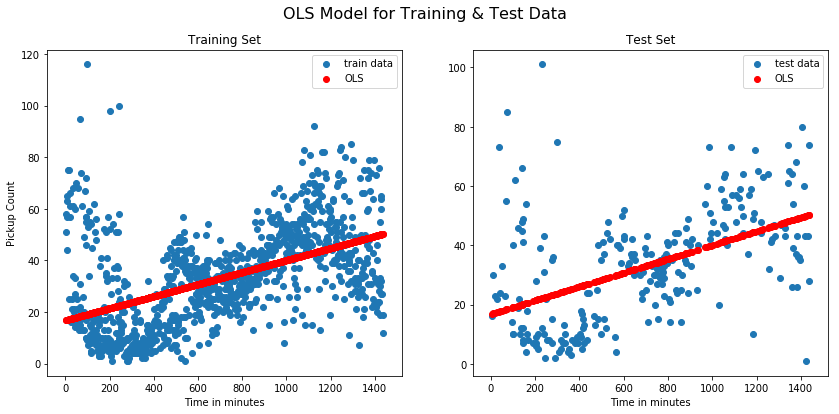

In [658]:
x_test2 = x_test.values.reshape(-1,1)
y_test2 = y_test.values.reshape(-1,1)

predictions = OLSModel.predict(sm.add_constant(x_test1))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
ax1.scatter(x_train1, y_train1, label="train data")
ax1.set_xlabel("Time in minutes")
ax2.set_xlabel("Time in minutes")
ax1.set_ylabel("Pickup Count")
ax1.set_title('Training Set')
ax2.set_title('Test Set')
ax2.scatter(x_test1, y_test1, label="test data")
# training data
ax1.scatter(x_train, OLSModel.predict(), color="red", label="OLS")
# testing data
ax2.scatter(x_test, predictions, color="red", label="OLS")


ax1.legend();
ax2.legend();
f.suptitle('OLS Model for Training & Test Data', fontsize=16);


**3.3**

In [659]:
print('R2 for training model:', OLSModel.rsquared)
r2_test = r2_score(y_test, OLSModel.predict(sm.add_constant(x_test1)))
print('R2 for test model:', r2_test)

R2 for training model: 0.2430260353189334
R2 for test model: 0.240661535615741


**3.4**

In [746]:
print('Direct Output:', OLSModel.params)
print('--------------')
print('Slope:', OLSModel.params[1])
print('intercept value:', OLSModel.params[0])

Direct Output: [16.75060143  0.02333518]
--------------
Slope: 0.023335175692397344
intercept value: 16.750601427446817


**3.5**

In [608]:
# 95% confidence interval
confid_int = OLSModel.conf_int(.05)

print('Slope (lower):', confid_int[1][0])
print('intercept value (lower):',confid_int[0][0])
print('Slope (upper):', confid_int[1][1])
print('intercept value (upper):', confid_int[0][1])

# resource used: https://stackoverflow.com/questions/24087785/how-to-return-slope-from-ols-in-statsmodels

Slope (lower): 0.02077697281825772
intercept value (lower): 14.67514134465737
Slope (upper): 0.025893378566536968
intercept value (upper): 18.826061510236265


**3.6**

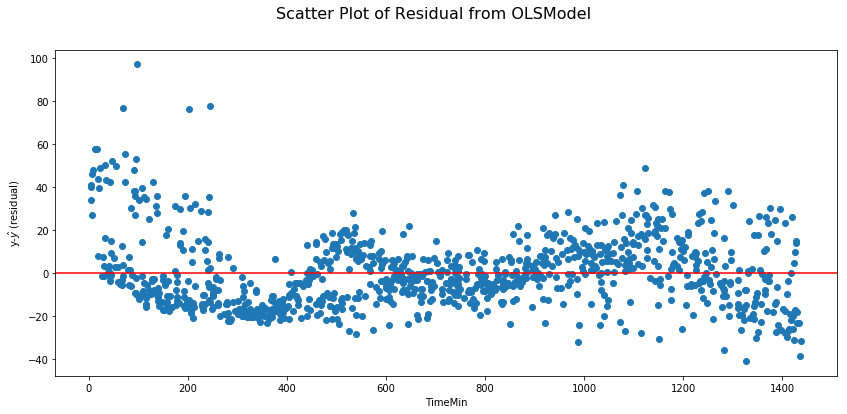

In [664]:
# e- y_true - y_pred

y_true = y_train
y_pred = OLSModel.predict()

residual = (y_true - y_pred)

fig, ax = plt.subplots(1,1, figsize=(14,6))
ax.scatter(x_train, residual, label="training data")
plt.axhline(0, color='red')
ax.set_xlabel('TimeMin')
ax.set_ylabel('y-$\hat{y}$ (residual)')
fig.suptitle('Scatter Plot of Residual from OLSModel', fontsize=16);


**3.7**

**Discuss the results**

1. *How does the test $R^2$ score compare with the best test $R^2$ value obtained with k-NN regression?*

The test r2 score from this model was: 0.24066, whereas the best R2 score from the kNN regression was 0.39301 at k = 75. kNN regresstion provided a beetter line of fit through the data at k = 75.

2. *What does the sign of the slope of the fitted linear model convey about the data?* 

Sign of the slope of the fitted linear model is positive. This means that there is a positive correlation between the data; so the value of y increases as x increases.

#source: http://www.kean.edu/~fosborne/bstat/09rc.html

3. *Based on the $95\%$ confidence interval, do you consider the estimates of the model parameters to be reliable?*  
    
Based on the 95% confidence internal, yes, I do consider the estimates of the model parameters to be reliable. Looking at the interval data, it does not seem to have a wide gulf between the upper and lower bounds. 

4. *Do you expect a $99\%$ confidence interval for the slope and intercept to be tighter or looser than the $95\%$ confidence intervals? Briefly explain your answer.*  

99% confidence interval would have to be looser than the 95% confidence interval because it means that there is a 99% chance that an observation/data can be obtained accurately. There is 99% accuracy of the slope/intercept, whereas at the 95% confidence interval, that accuracy is only at 95%. The 99% confidence interval is wider than the 95%.

#source: https://stats.stackexchange.com/questions/16164/narrow-confidence-interval-higher-accuracy

5. *Based on the residuals plot that you made, discuss whether or not the assumption of linearity is valid for this data.*

Yes, in this case, the assumption of linearity is valid because the residual pot shows a random disperal of points around the horizontal axis. If they weren't randomly distributed across the axis, then this linear model would not fit the data.

#source: https://stattrek.com/regression/residual-analysis.aspx

<div class="exercise">  <b> Question 4 [20 pts]: Roll Up Your Sleeves Show Some Class </b> </div>

We've seen Simple Linear Regression in action and we hope that you're convinced it works.  In lecture we've thought about the mathematical basis for Simple Linear Regression.  There's no reason that we can't take advantage of our knowledge to create our own implementation of Simple Linear Regression.  We'll provide a bit of a boost by giving you some basic infrastructure to use.  In the last problem, you should have heavily taken advantage of the `statsmodels` module.  In this problem we're going to build our own machinery for creating Linear Regression models and in doing so we'll follow the `statsmodels` API pretty closely.  Because we're following the `statmodels` API, we'll need to use python classes to create our implementation.  If you're not familiar with python classes don't be alarmed.  Just implement the requested functions/methods in the CS109OLS class that we've given you below and everything should just work.  If you have any questions, ask the teaching staff.

**4.1**. Implement the `fit` and `predict` methods in the CS109OLS class we've given you below as well as the `CS109r2score` function that we've provided outside the class.

**Hints**:

1. `fit` should take the provided numpy arrays `endog` and `exog` and use the normal equations to calculate the optimal linear regression coefficients.  Store those coefficients in self.params
2. In `fit` you'll need to calculate an inverse.  Use np.linalg.pinv
3. `predict` should use the numpy array stored in self.exog and calculate an np.array of predicted values.
4. `CS109r2score` should take the true values of the response variable `y_true` and the predicted values of the response variable `y_pred` and calculate and return the $R^2$ score. 
5.  To replicate the statsmodel API your code should be able to be called as follows:
    ```python
    mymodel = CS109OLS(y_data, augmented_x_data)
    mymodel.fit()
    predictions = mymodel.predict()
    R2score = CS109r2score(true_values, predictions)
    ```

**4.2**. As in 3.1 create a `CS109OLS` class instance and  fit a Linear Regression model on the training set (`train_data`).  Store your model in the variable `CS109OLSModel`.  Remember that as with sm.OLS your class should assume you want to fit an intercept as part of your linear model (so you may need to add a constant column to your predictors).

**4.3**  As in 3.2 Overlay a scatter plot of the actual values of `PickupCount` vs. `TimeMin` on the training set with a scatter plot of `PickupCount` vs predictions of `TimeMin` from your `CS109OLSModel` Linear Regression model on the training set.  Do the same for the test set.  You should have one figure with two subplots, one subplot for the training set and one for the test set.  How does your figure compare to that in 3.2?

**Hints**:
1. Each subplot should use different color and/or markers to distinguish Linear Regression prediction values from that of the actual data values.
2. Each subplot must have appropriate axis labels, title, and legend.
3. The overall figure should have a title.  (use `suptitle`)

**4.4**. As in 3.3, report the $R^2$ score for the fitted model on both the training and test sets using your `CS109OLSModel`.  Make sure to use the `CS109r2score` that you created.  How do the results compare to the the scores in 3.3?

**4.5**. as in 3.4, report the slope and intercept values for the fitted linear model your `CS109OLSModel`.   How do the results compare to the the values in 3.4?




### Answers

**4.1**

In [881]:
class CS109OLS(object):
# endog = y, excog = x
# used Lab2Solutions to work through this
    
    def __init__(self, endog = [], exog = []):
        
        ## Make sure you initialize self.params
        self.params = []
              
        ## store exog and endog in instance variables
        self.endog = np.array(endog)
        self.exog = np.array(exog)
                    
    def fit(self):
        
        if len(self.exog.shape) < 2:
            print("WARNING: Reshaping features array.")
            x_train = self.exog.reshape(self.exog.shape[0], 1)

        if len(self.endog.shape) < 2:
            print("WARNING: Reshaping observations array.")
            y_train = self.endog.reshape(self.endog.shape[0], 1)
        
        y_bar = np.mean(y_train)
        x_bar = np.mean(x_train)
        
        numerator = np.sum( (x_train - x_bar)*(y_train - y_bar) )
        denominator = np.sum((x_train - x_bar)**2)
        
        beta_1 = numerator/denominator

        beta_0 = y_bar - beta_1*x_bar
        
        self.params = np.array([beta_0, beta_1])
        
        return self
            
    def predict(self):
        
        # check if the linear regression coefficients have been calculated
        if not np.array(self.params).size:
            raise(Exception("fit() has not been called on OLS Model!"))
            
        best_fit = beta_0 + beta_1 * self.exog
        
        return best_fit(self)
        
def CS109r2score(y_true, y_pred):
    
    top = sum((y_pred - y_train)^2)
    bottom = sum((mean(y_train)-(y_train))^2)
    r2 = 1 - (top/bottom)
    
    return(r2)


**4.2**

In [883]:
data_new = pd.read_csv("dataset_1.csv")
data_new.head()

traindf1, testdf1 = train_test_split(data_new, test_size = 0.2, random_state = 42)

train_data1 = traindf1
test_data1 = testdf1

train_y = traindf1.PickupCount
train_x = traindf1.TimeMin
test_y =  testdf1.PickupCount
test_x = testdf1.TimeMin

X_this = sm.add_constant(train_x)
mymodel = CS109OLS(train_y, X_this)

CS109OLSModel = mymodel

**4.3**

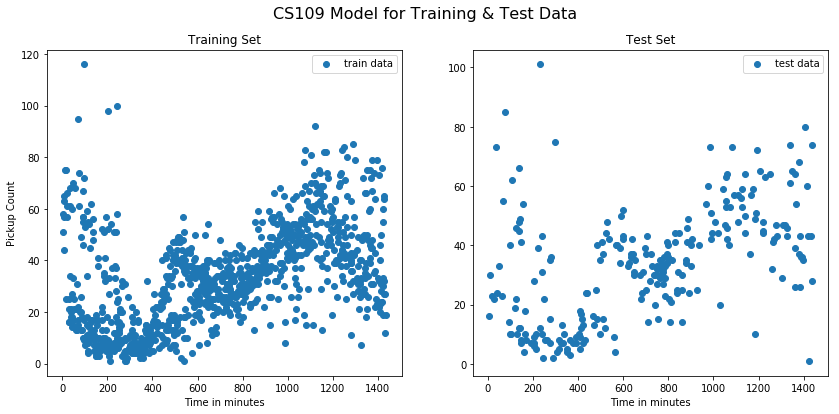

In [890]:
## Code for your plot here

# x_test2 = x_test.values.reshape(-1,1)
# y_test2 = y_test.values.reshape(-1,1)



# predictions1 = CS109OLS.predict(sm.add_constant(test_y))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
ax1.scatter(train_x, train_y, label="train data")
ax1.set_xlabel("Time in minutes")
ax2.set_xlabel("Time in minutes")
ax1.set_ylabel("Pickup Count")
ax1.set_title('Training Set')
ax2.set_title('Test Set')
ax2.scatter(test_x, test_y, label="test data")
# training data
# ax1.scatter(train_x, CS109OLS.predict(), color="red", label="CS109")
# testing data
# ax2.scatter(x_test, predictions1, color="red", label="CS109")


ax1.legend();
ax2.legend();
f.suptitle('CS109 Model for Training & Test Data', fontsize=16);


**4.4**

In [896]:
CS109r2score(train_y, (test_y))

TypeError: cannot compare a dtyped [float64] array with a scalar of type [bool]

**4.5**

In [ ]:
## Code here



<div class="exercise"><b> Question 5 </b></div>.

You may recall from lectures that OLS Linear Regression can be susceptible to outliers in the data.  We're going to look at a dataset that includes some outliers and get a sense for how that affects modeling data with Linear Regression.


**5.1**. We've provided you with two files `outliers_train.csv` and `outliers_test.csv` corresponding to training set and test set data.  What does a visual inspection of training set tell you about the existence of outliers in the data?

**5.2**. Choose `X` as your feature variable and `Y` as your response variable.  Use `statsmodel` to create a Linear Regression model on the training set data.  Store your model in the variable `OutlierOLSModel`.

**5.3**. You're given the knowledge ahead of time that there are 3 outliers in the training set data.  The test set data doesn't have any outliers.  You want to remove the 3 outliers in order to get the optimal intercept and slope.  In the case that you're sure ahead of time of the existence and number (3) of outliers ahead of time, one potential brute force method to outlier detection might be to find the best Linear Regression model on all possible subsets of the training set data with 3 points removed.  Using this method, how many times will you have to calculate the Linear Regression coefficients on the training data?  

**5.4**  In CS109 we're strong believers that creating heuristic models is a great way to build intuition. **In that spirit, construct an approximate algorithm to find the 3 outlier candidates in the training data by taking advantage of the Linear Regression residuals.** Place your algorithm in the function `find_outliers_simple`.  It should take the parameters `dataset_x` and `dataset_y` representing your features and response variable values (make sure your response variable is stored as a numpy column vector).  The return value should be a list `outlier_indices` representing the indices of the outliers in the original datasets you passed in.  Remove the outliers that your algorithm identified, use `statsmodels` to create a Linear Regression model on the remaining training set data, and store your model in the variable `OutlierFreeSimpleModel`.

**Hint:** 
    1. What measure might you use to compare the performance of different Linear Regression models?

**5.5** Create a figure with two subplots.  In one subplot include a visualization of the Linear Regression line from the full training set overlayed on the test set data in `outliers_test`.  In the other subplot include a visualization of the Linear Regression line from the training set data with outliers removed overlayed on the test set data in `outliers_test`.  Visually which model fits the test set data more closely?

**5.6**. Calculate the $R^2$ score for the `OutlierOLSModel` and the `OutlierFreeSimpleModel` on the test set data.  Which model produces a better $R^2$ score?

**5.7**. One potential problem with the brute force outlier detection approach in 5.3 and the heuristic algorithm constructed in 5.4 is that they assume prior knowledge of the number of outliers.  In general we can't expect to know ahead of time the number of outliers in our dataset.  Alter the algorithm you constructed in 5.4 to create a more general heuristic (i.e. one which doesn't presuppose the number of outliers) for finding outliers in your dataset.  Store your algorithm in the function `find_outliers_general`.  It should take the parameters `dataset_x` and `dataset_y` representing your features and response variable values (make sure your response variable is stored as a numpy column vector).  It can take additional parameters as long as they have default values set.  The return value should be the list `outlier_indices` representing the indices of the outliers in the original datasets you passed in (in the order that your algorithm found them).  Remove the outliers that your algorithm identified, use `statsmodels` to create a Linear Regression model on the remaining training set data, and store your model in the variable `OutlierFreeGeneralModel`.

**Hints**:
   1. How many outliers should you try to identify in each step? (i.e. is there any reason not to try to identify one outlier at a time)
   2. If you plotted an $R^2$ score for each step the algorithm, what might that plot tell you about stopping conditions?
   3. As mentioned earlier we don't know ahead of time how many outliers to expect in the dataset or know mathematically  how we'd define a point as an outlier.  For this general algorithm, whatever measure you use to determine a point's impact on the Linear Regression model (e.g. difference in R^2, size of the residual or maybe some other measure) you may want to determine a tolerance level for that measure at every step below which your algorithm stops looking for outliers.
   4. You may also consider the maximum possible number of outliers it's reasonable for a dataset of size $n$ to have and use that as a cap for the total number of outliers identified (i.e. would it reasonable to expect all but one point in the dataset to be an outlier?)
    
**5.8**. Run your algorithm in 5.7 on the training set data.  

   1. What outliers does it identify?
   2. How do those outliers compare to the outliers you found in 5.4?
   3. How does the general outlier-free Linear Regression model you created in 5.7 perform compared to the simple one in 5.4?

### Answers

**5.1**

*What does a visual inspection of training set tell you about the existence of outliers in the data?*
  
Just a quick visual inspection of the training set shows that there are about 3 data points that are completely out of line and apart of the "normal" data set. About three or so outliers in the data.

**5.2**

In [685]:
data = pd.read_csv("outliers_train.csv")
data.head()

dataset_x = data.X
dataset_y = data.Y

X_new = sm.add_constant(dataset_x)
data_train = sm.OLS(dataset_y, X_new)

OutlierOLSModel = data_train.fit()

**5.3**

*You're given the knowledge ahead of time that there are 3 outliers in the training set data.  The test set data doesn't have any outliers.  You want to remove the 3 outliers in order to get the optimal intercept and slope.  In the case that you're sure ahead of time of the existence and number (3) of outliers ahead of time, one potential brute force method to outlier detection might be to find the best Linear Regression model on all possible subsets of the training set data with 3 points removed.  Using this method, how many times will you have to calculate the Linear Regression coefficients on the training data?*
  
53 total data points. 3 outliers. Brute force would mean we are computing this over and over again, so the correct answer would be (53-3)!; 50 factorial

**5.4**

In [759]:
arr_y = [dataset_y]
a_y = np.array(arr_y)
a_y = a_y[(a_y <= 275)]

arr_x = [dataset_x]
a_x = np.array(arr_x)
a_x = a_x[(a_x >= -1.75)]

outlier_indices = (a_x, a_y)

X_new1 = sm.add_constant(a_x)
data_train1 = sm.OLS(a_y, X_new1)

OutlierFreeSimpleModel = data_train1.fit()

**5.5**

Visually, the OutlierFreeSimpleModel seems to fit the data more closely



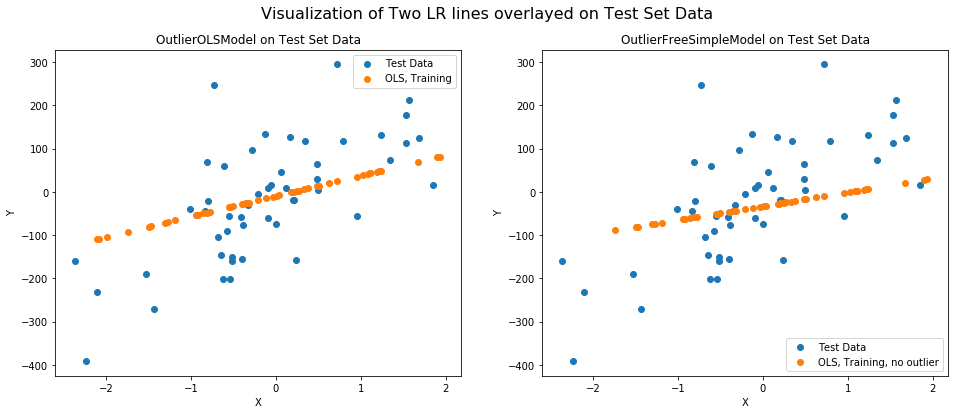

In [774]:
data_test = pd.read_csv("outliers_test.csv")
data_test.head()

test_x = data_test.X
test_y = data_test.Y

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
ax1.scatter(test_x, test_y, label="Test Data")
ax1.set_xlabel("X")
ax2.set_xlabel("X")
ax1.set_ylabel("Y")
ax2.set_ylabel("Y")
ax1.set_title('OutlierOLSModel on Test Set Data')
ax2.set_title('OutlierFreeSimpleModel on Test Set Data')
ax1.scatter(dataset_x, OutlierOLSModel.predict(), label="OLS, Training")
ax2.scatter(test_x, test_y, label="Test Data")
ax2.scatter(a_x, OutlierFreeSimpleModel.predict(), label="OLS, Training, no outlier")
ax1.legend();
ax2.legend();
f.suptitle('Visualization of Two LR lines overlayed on Test Set Data', fontsize=16);

print('Visually, the OutlierFreeSimpleModel seems to fit the data more closely\n')

**5.6**

In [778]:
print('R2 for OutlierOLSModel:', OutlierOLSModel.rsquared)
print('R2 for OutlierFreeSimpleModel:', OutlierFreeSimpleModel.rsquared)

R2 for OutlierOLSModel: 0.08420240965174708
R2 for OutlierFreeSimpleModel: 0.037600939740863426


Looking at the two Models, **OutlierOLSModel** provides a better R2 score, so it is a better fit.

**5.7**

In [867]:
# insert data into PandasDF
df = pd.DataFrame({'X': dataset_x, 'Y': dataset_y})

# filter out data that doesn't fit 95th quantile, source code for that is below!
filtered = df["Y"].quantile(0.95)
x = df[df["Y"] < filtered]
outlier_indicies2 = x

X_new2 = sm.add_constant(outlier_indicies2['X'])
data_train1 = sm.OLS(outlier_indicies2['Y'], X_new2)

OutlierFreeGeneralModel = data_train1.fit()

#USED below resources to help me do this! (lines 5 to 7)
#link: https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-dataframe
#link: https://stackoverflow.com/questions/48087534/checking-a-pandas-dataframe-for-outliers
#link: https://stackoverflow.com/questions/18580461/eliminating-all-data-over-a-given-percentile/39276195
#link: http://colingorrie.github.io/outlier-detection.html

**5.8**

In [874]:
print('# of Data Points (Original Set):', len(df))
print('# of Data Points (after Outliers are removed in 5.7):', len(x))
print('R2 value after outliers removed:', OutlierFreeGeneralModel.rsquared)

# of Data Points (Original Set): 53
# of Data Points (after Outliers are removed in 5.7): 50
R2 value after outliers removed: 0.2716851434635784


1. *What outliers does it identify?*
    
After filtering out values not in the 95th quartile, the algoritm removed three points in the set.

2. *How do those outliers compare to the outliers you found in 5.4?*
    
They were three **different** data points. Not the same points were removed. We know this because the R2 value increased sharply between the method in 5.4 compared to 5.7.

3. *How does the general outlier-free Linear Regression model you created in 5.7 perform compared to the simple one in 5.4?*

The method I came up with 5.4 was pretty simple. Basically I graphed the original training data and found some points that were not in the "same area" as the rest of the data points, so I set up filters to get rid of them. It was very rudamentary and not very good, espeically since the r2 value was so poor. The method I used in 5.7 consisted of filtering the pd df by getting rid of every point that wasn't in the 95th quantile. It also found three points, but they were completely different. This tremendously increased the r2 value to 0.271.    

---- 


In [1]:
from IPython.core.display import HTML
def css_styling(): styles = open("cs109.css", "r").read(); return HTML(styles)
css_styling()